In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
GRAPHS_FOLDER = 'Graphs/{}.png'

## Task 1

Исследуйте, как объем обучающей выборки и количество тестовых данных, влияет на точность классификации в датасетах про крестики-нолики (tic_tac_toe.txt) и о спаме e-mail сообщений (spam.csv) с помощью наивного Байесовского классификатора.  Постройте графики зависимостей точности на обучающей и тестовой выборках в зависимости от их соотношения.

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
tic_tac_df = pd.read_csv('tic_tac_toe.txt', header=None)
tic_tac_df.shape

(958, 10)

In [5]:
tic_tac_df.head()

0  1  2  3  4  5  6  7  8         9
0  x  x  x  x  o  o  x  o  o  positive
1  x  x  x  x  o  o  o  x  o  positive
2  x  x  x  x  o  o  o  o  x  positive
3  x  x  x  x  o  o  o  b  b  positive
4  x  x  x  x  o  o  b  o  b  positive

In [6]:
X_tt = tic_tac_df.iloc[:, :-1]
y_tt = tic_tac_df.iloc[:, [-1]]

In [7]:
spam_df = pd.read_csv('spam.csv')
spam_df = spam_df.drop(spam_df.columns[0], axis=1)
spam_df.shape

(4601, 58)

In [8]:
spam_df.head()

make  address   all  num3d   our  over  remove  internet  order  mail  ...  \
0  0.00     0.64  0.64    0.0  0.32  0.00    0.00      0.00   0.00  0.00  ...   
1  0.21     0.28  0.50    0.0  0.14  0.28    0.21      0.07   0.00  0.94  ...   
2  0.06     0.00  0.71    0.0  1.23  0.19    0.19      0.12   0.64  0.25  ...   
3  0.00     0.00  0.00    0.0  0.63  0.00    0.31      0.63   0.31  0.63  ...   
4  0.00     0.00  0.00    0.0  0.63  0.00    0.31      0.63   0.31  0.63  ...   

   charSemicolon  charRoundbracket  charSquarebracket  charExclamation  \
0           0.00             0.000                0.0            0.778   
1           0.00             0.132                0.0            0.372   
2           0.01             0.143                0.0            0.276   
3           0.00             0.137                0.0            0.137   
4           0.00             0.135                0.0            0.135   

   charDollar  charHash  capitalAve  capitalLong  capitalTotal  type  
0       0.000     0.000       3.756           61           278  spam  
1       0.180     0.048       5.114          101          1028  spam  
2       0.184     0.010       9.821          485          2259  spam  
3       0.000     0.000       3.537           40           191  spam  
4       0.000     0.000       3.537           40           191  spam  

[5 rows x 58 columns]

In [9]:
X_s = spam_df.iloc[:, :-1]
y_s = spam_df.iloc[:, [-1]]

In [10]:
def evaluate_dependence(X, y, graph_name=None):
    tr = np.arange(0.05, 1, 0.05)
    acc = []
    for train_size in np.arange(0.05, 1, 0.05):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
        gnb = GaussianNB()
        gnb.fit(pd.get_dummies(X_train), y_train)
        y_pred = gnb.predict(pd.get_dummies(X_test))
        acc.append(accuracy_score(y_test, y_pred))
    plt.figure(figsize=(15,10))
    plt.plot(tr, acc, 'bo-')
    plt.ylim([min(acc) - 0.05, max(acc) + 0.05])
    plt.xticks(tr, fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Train size', fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
    if graph_name is not None: plt.savefig(GRAPHS_FOLDER.format(graph_name), bbox_inches='tight')
    plt.show()

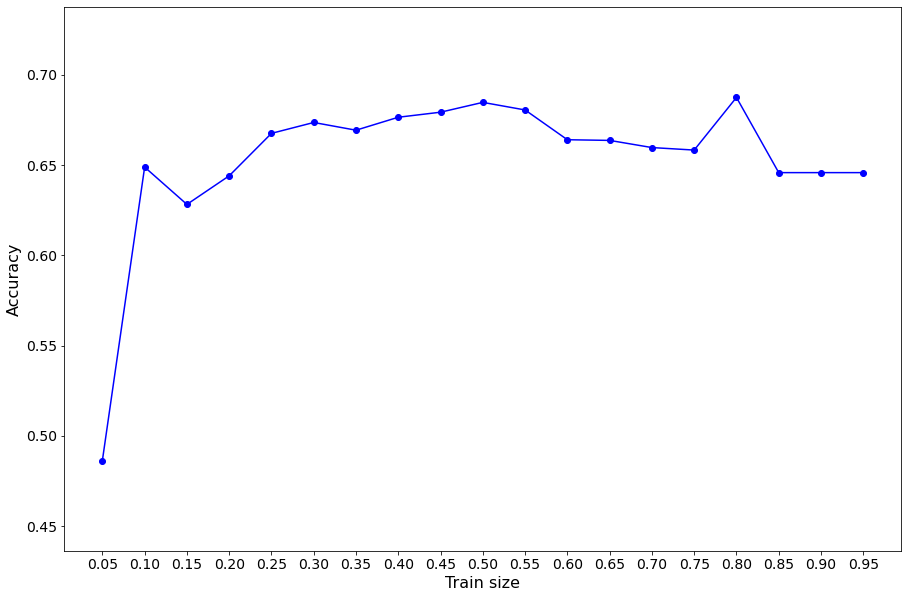

In [11]:
evaluate_dependence(X_tt, y_tt.values.ravel(), 'Task 1. Tic tac toe. Accuracy')

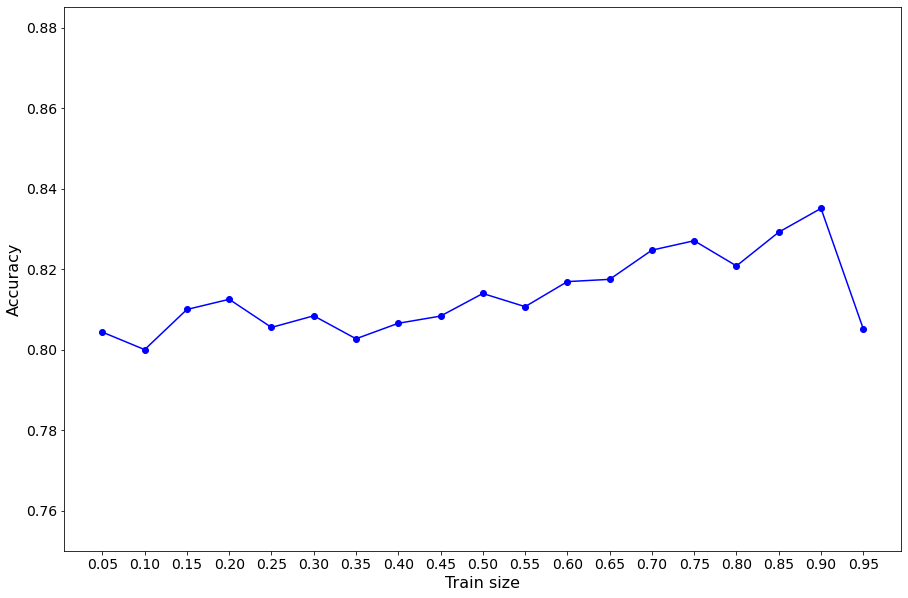

In [12]:
evaluate_dependence(X_s, y_s.values.ravel(), 'Task 1. Spam. Accuracy')

## Task 2

Сгенерируйте 100 точек с двумя признаками X1 и X2 в соответствии с нормальным распределением так, что одна и вторая часть точек (класс -1 и класс 1) имеют параметры: мат. ожидание X1, мат. ожидание X2, среднеквадратические отклонения для обеих переменных, соответствующие вашему варианту (указан в таблице). Построить диаграммы, иллюстрирующие данные. Построить Байесовский классификатор и оценить качество классификации с помощью различных методов (точность, матрица ошибок, ROС и PR-кривые). Является ли построенный классификатор «хорошим»?

In [13]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve

In [14]:
x1_1 = np.random.normal(17, 4, 30)
x1_2 = np.random.normal(16, 5, 70)
x2_1 = np.random.normal(16, 4, 30)
x2_2 = np.random.normal(14, 5, 70)

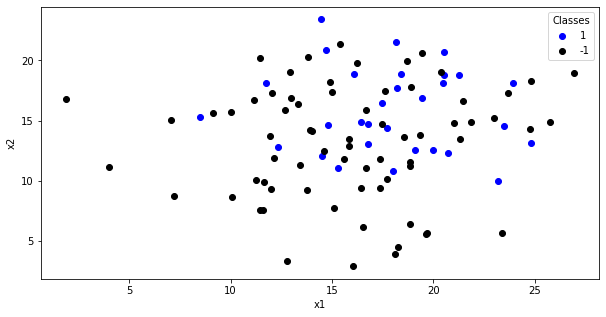

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(x1_1, x2_1, c='blue', label='1')
plt.scatter(x1_2, x2_2, c='black', label='-1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(title='Classes')
plt.savefig(GRAPHS_FOLDER.format('Task 2. Normal distribution graph'), bbox_inches='tight')
plt.show()

In [16]:
tmp_1 = pd.DataFrame({'x1': x1_1, 'x2': x2_1})
tmp_1['class'] = -1

In [17]:
tmp_2 = pd.DataFrame({'x1': x1_2, 'x2': x2_2})
tmp_2['class'] = 1

In [18]:
df = pd.concat([tmp_1, tmp_2], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

In [19]:
X = df.iloc[:, :-1]
y = df.iloc[:, [-1]]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65, random_state=42)

In [21]:
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())
y_pred = gnb.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred)

0.6571428571428571

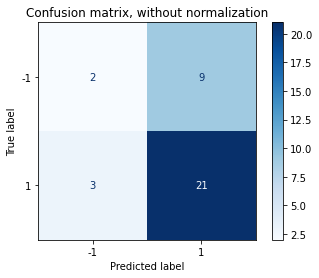

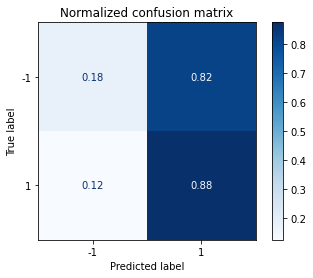

In [23]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gnb, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    plt.savefig(GRAPHS_FOLDER.format('Task 2. ' + title), bbox_inches='tight')
plt.show()

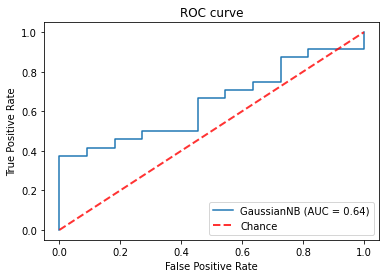

In [24]:
plot_roc_curve(gnb, X_test, y_test)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.savefig(GRAPHS_FOLDER.format('Task 2. Normal distribution. ROC Curve'), bbox_inches='tight')
plt.show()

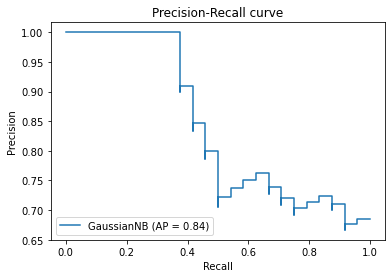

In [25]:
disp = plot_precision_recall_curve(gnb, X_test, y_test)
plt.title('Precision-Recall curve')
plt.savefig(GRAPHS_FOLDER.format('Task 2. Normal distribution. PR Curve'), bbox_inches='tight')
plt.show()

## Task 3

Постройте классификатор на основе метода k ближайших соседей для обучающего множества Glass (glass.csv). Посмотрите заголовки признаков и классов. Перед построением классификатора необходимо также удалить первый признак Id number, который не несет никакой информационной нагрузки.

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
glass_df = pd.read_csv('glass.csv')
glass_df = glass_df.drop(glass_df.columns[0], axis=1)

In [28]:
glass_df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [29]:
X = glass_df.iloc[:, :-1]
y = glass_df.iloc[:, [-1]]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

a. Постройте графики зависимости ошибки классификации от количества ближайших соседей.

In [31]:
err = []
for n in range(1, 50, 2):
    clf = KNeighborsClassifier(n, n_jobs=-1)
    clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    err.append(1 - accuracy_score(y_test, y_pred))

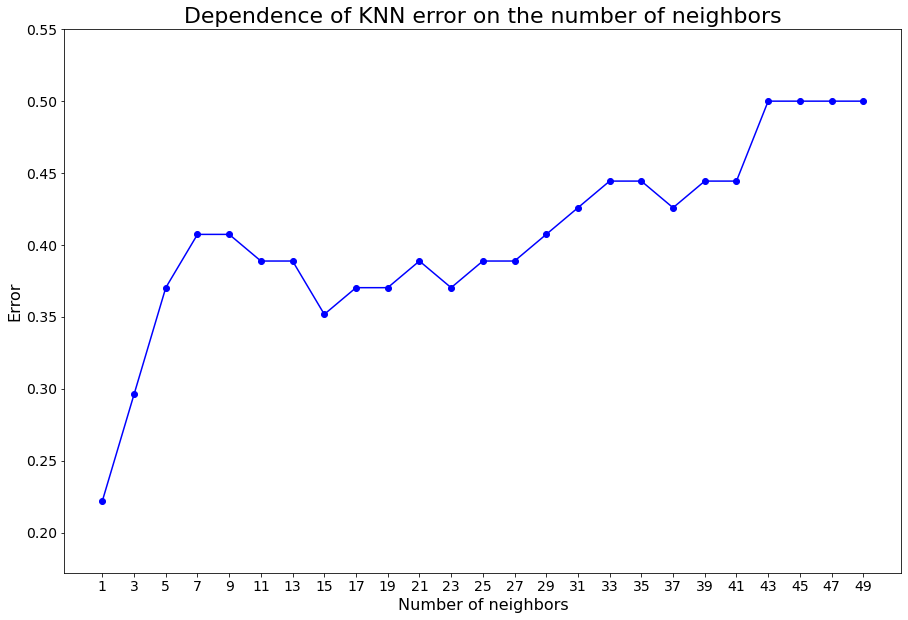

In [32]:
plt.figure(figsize=(15,10))
plt.plot(range(1, 50, 2), err, 'bo-')
plt.ylim([min(err) - 0.05, max(err)+0.05])
plt.xticks(range(1, 50, 2), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of neighbors', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.title('Dependence of KNN error on the number of neighbors', fontsize=22)
plt.savefig(GRAPHS_FOLDER.format('Task 3_a. Dependence of KNN error on the number of neighbors'),
            bbox_inches='tight')
plt.show()

b. Определите подходящие метрики расстояния и исследуйте, как тип метрики расстояния влияет на точность классификации.

In [33]:
err = []
for distance in range(1, 11):
    clf = KNeighborsClassifier(p=distance, n_jobs=-1)
    clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    err.append(1 - accuracy_score(y_test, y_pred))

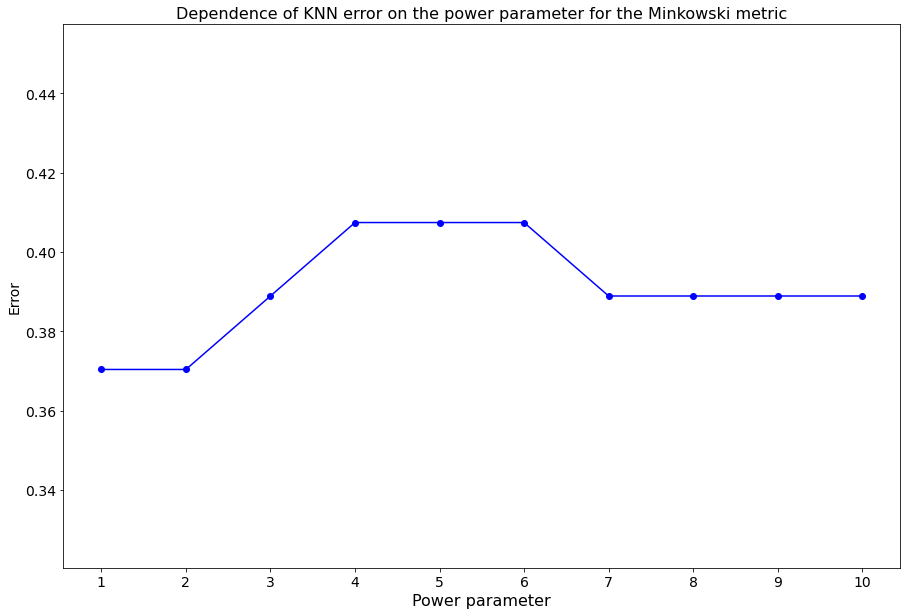

In [34]:
plt.figure(figsize=(15,10))
plt.plot(range(1, 11), err, 'bo-')
plt.ylim([min(err) - 0.05, max(err) + 0.05])
plt.xticks(range(1, 11), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Power parameter', fontsize=16)
plt.ylabel('Error', fontsize=14)
plt.title('Dependence of KNN error on the power parameter for the Minkowski metric', fontsize=16)
plt.savefig(GRAPHS_FOLDER.format('Task 3_b. Dependence of KNN error the power parameter for the Minkowski metric'),
            bbox_inches='tight')
plt.show()

c. Определите, к какому типу стекла относится экземпляр с характеристиками:

   RI=1.516 Na=11.7 Mg=1.01 Al=1.19 Si=72.59 K=0.43 Ca=11.44 Ba=0.02 Fe=0.1

In [35]:
test = pd.DataFrame({'RI': 1.516, 'Na': 11.7, 'Mg': 1.01, 'Al': 1.19, 'Si': 72.59, \
                     'K': 0.43, 'Ca': 11.44, 'Ba': 0.02, 'Fe': 0.1}, index=[0])

KNN с параметрами по умолчанию

In [36]:
clf = KNeighborsClassifier(n_jobs=-1)
clf.fit(X_train, y_train.values.ravel())
clf.predict(test)

array([5], dtype=int64)

KNN с лучшими параметрами на основе предыдущих данных

In [37]:
clf = KNeighborsClassifier(n_neighbors=1, p=1, n_jobs=-1)
clf.fit(X_train, y_train.values.ravel())
clf.predict(test)

array([5], dtype=int64)

Ещё один пример KNN с неплохими параметрами

In [38]:
clf = KNeighborsClassifier(n_neighbors=15, p=2, n_jobs=-1)
clf.fit(X_train, y_train.values.ravel())
clf.predict(test)

array([5], dtype=int64)

## Task 4

Постройте классификаторы на основе метода опорных векторов для наборов данных из файлов svmdataN.txt и svmdataNtest.txt, где N –  индекс задания:

In [39]:
from sklearn.svm import SVC

a. Постройте алгоритм метода опорных векторов с линейным ядром. Визуализируйте разбиение пространства признаков на области с помощью полученной модели (пример визуализации). Выведите количество полученных опорных векторов, а также матрицу ошибок классификации на обучающей и тестовой выборках.

In [40]:
svmdata_df = pd.read_csv('svmdata_a.txt', sep='\t')
svmdata_test_df = pd.read_csv('svmdata_a_test.txt', sep='\t')

In [41]:
def get_encoder(arr):
    arr = pd.Series(arr)
    u = arr.unique()
    m = pd.Series(range(len(u)), u)
    return m.to_dict()

In [42]:
def train_test_split_custom(train_df, test_df):
    X_tr = train_df.iloc[:, :-1]
    y_tr = train_df.iloc[:, -1]
    X_tt = test_df.iloc[:, :-1]
    y_tt = test_df.iloc[:, -1]
    return X_tr, X_tt, y_tr, y_tt

In [43]:
encoder = get_encoder(svmdata_df.iloc[:, -1])
X_train, X_test, y_train, y_test = train_test_split_custom(svmdata_df, svmdata_test_df)
y_train = y_train.map(encoder)
y_test = y_test.map(encoder)

In [44]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

Код из предложенного источника: https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

In [45]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [46]:
def plot_contours(ax, clf, xx, yy, encoder, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [47]:
def apply_models(X_test, y_test, models, titles, encoder, rows=1, cols=1, size=None, graph_name=None):
    X0, X1 = X_test.iloc[:, [0]].values, X_test.iloc[:, [1]].values
    
    fig, sub = plt.subplots(rows, cols, figsize=size)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    xx, yy = make_meshgrid(X0, X1)
    for clf, title, ax in zip(models, titles, (sub,) if rows==cols==1 else sub.flatten()):
        plot_contours(ax, clf, xx, yy, encoder,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Sepal length')
        ax.set_ylabel('Sepal width')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)
    if graph_name is not None:
        plt.savefig(GRAPHS_FOLDER.format(graph_name), bbox_inches='tight')
    plt.show()

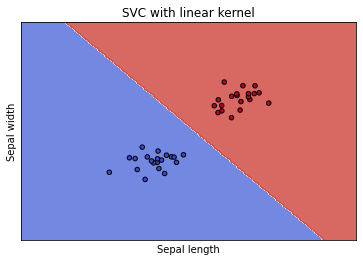

In [48]:
apply_models(X_test, y_test, (clf,), ('SVC with linear kernel',), encoder,
             graph_name='Task 4_a. SVC with linear kernel')

In [49]:
print('Number of support vectors for each class', clf.n_support_)

Number of support vectors for each class [3 3]


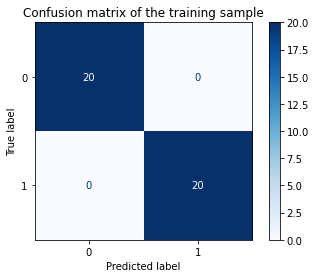

In [50]:
plot_confusion_matrix(clf, X_train, y_train,cmap=plt.cm.Blues)
plt.title('Confusion matrix of the training sample')
plt.savefig(GRAPHS_FOLDER.format('Task 4_a. Confusion matrix of the training sample'), bbox_inches='tight')
plt.show()

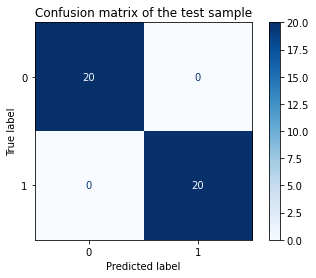

In [51]:
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)
plt.title('Confusion matrix of the test sample')
plt.savefig(GRAPHS_FOLDER.format('Task 4_a. Confusion matrix of the test sample'), bbox_inches='tight')
plt.show()

b. Постройте алгоритм метода опорных векторов с линейным ядром. Добейтесь нулевой ошибки сначала на обучающей выборке, а затем на тестовой, путем изменения штрафного параметра. Выберите оптимальное значение данного параметра и объясните свой выбор. Всегда ли нужно добиваться минимизации ошибки на обучающей выборке?

In [52]:
svmdata_df = pd.read_csv('svmdata_b.txt', sep='\t')
svmdata_test_df = pd.read_csv('svmdata_b_test.txt', sep='\t')

In [53]:
encoder = get_encoder(svmdata_df.iloc[:, -1])
X_train, X_test, y_train, y_test = train_test_split_custom(svmdata_df, svmdata_test_df)
y_train = y_train.map(encoder)
y_test = y_test.map(encoder)

In [54]:
train_acc = []
test_acc = []
for c in [1, 10, 100, 100, 1000, 10000]:
    clf = SVC(kernel='linear', C=c)
    clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_pred))
    y_pred = clf.predict(X_test)
    test_acc.append(accuracy_score(y_test, y_pred))

In [55]:
print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)

Train accuracy: [0.98, 0.98, 0.98, 0.98, 1.0, 1.0]
Test accuracy: [1.0, 1.0, 1.0, 1.0, 0.94, 0.94]


По умолчанию в реализации метода SVM библиотеки scikit-learn штрафной параметр равен 1. Для данной модели этот параметр оптимальный, так как при его увеличении, строгость регуляризации падает ("The strength of the regularization is inversely proportional to C"). Чем меньше строгость, тем больше модель переобучается на train-выборке, что негативно сказывается на качестве модели (лучше всего это видно при C=1000 и C=10000). Поэтому лучше пожертвовать точностью на обучающей выборке и позволить модели вычленить общие закономерности, а не частные особенности.

c. Постройте алгоритм метода опорных векторов, используя различные ядра (линейное, полиномиальное степеней 1-5, сигмоидальная функция, гауссово). Визуализируйте разбиение пространства признаков на области с помощью полученных моделей. Сделайте выводы.

In [56]:
svmdata_df = pd.read_csv('svmdata_c.txt', sep='\t')
svmdata_test_df = pd.read_csv('svmdata_c_test.txt', sep='\t')

In [57]:
encoder = get_encoder(svmdata_df.iloc[:, -1])
X_train, X_test, y_train, y_test = train_test_split_custom(svmdata_df, svmdata_test_df)
y_train = y_train.map(encoder)
y_test = y_test.map(encoder)

In [58]:
def get_models():
    return (
        SVC(kernel='linear'),
        SVC(kernel='poly', degree=1),
        SVC(kernel='poly', degree=2),
        SVC(kernel='poly', degree=3),
        SVC(kernel='poly', degree=4),
        SVC(kernel='poly', degree=5),
        SVC(kernel='sigmoid'),
        SVC(kernel='rbf')
    )

In [59]:
models = get_models()
models = (clf.fit(X_train, y_train) for clf in models)

In [60]:
titles = ('SVC with linear kernel',
          'SVC with polynomial kernel, degree=1',
          'SVC with polynomial kernel, degree=2',
          'SVC with polynomial kernel, degree=3',
          'SVC with polynomial kernel, degree=4',
          'SVC with polynomial kernel, degree=5',
          'SVC with sigmoid kernel',
          'SVC with RBF kernel',
)

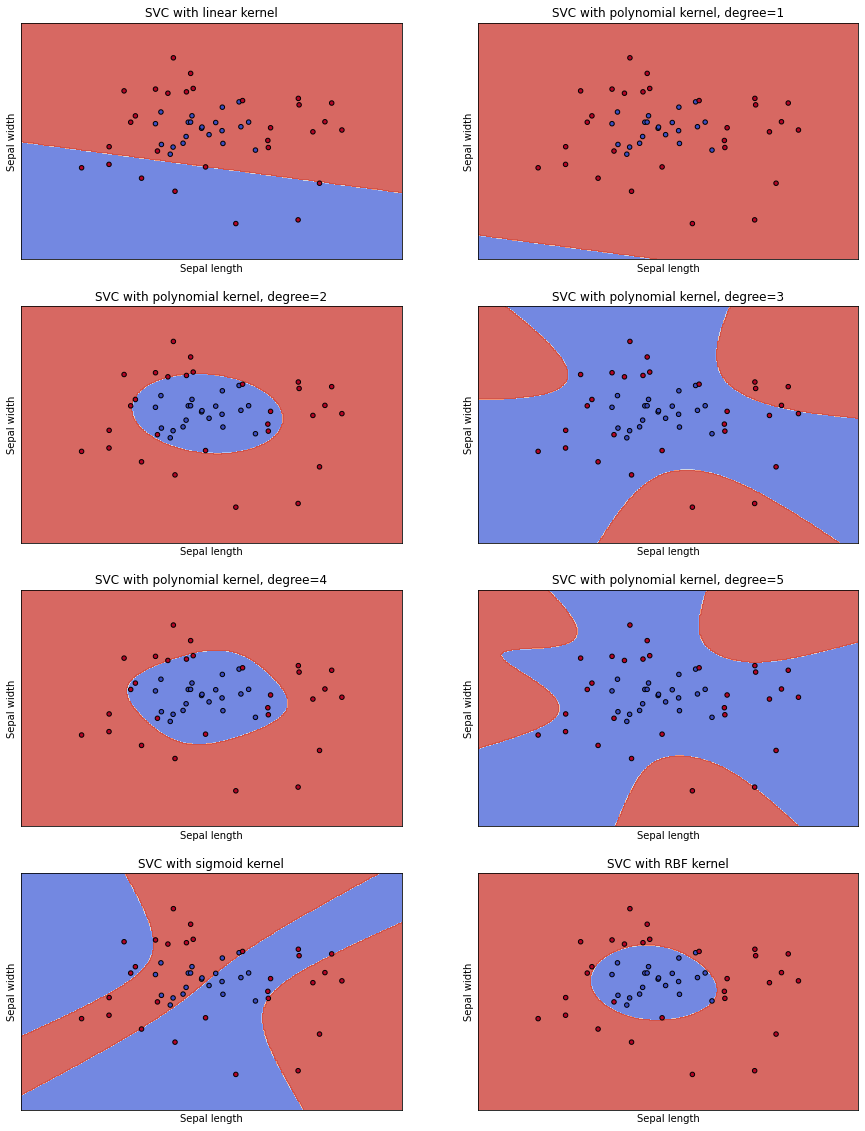

In [61]:
apply_models(X_test, y_test, models, titles, encoder, 4, 2, (15, 20),
             'Task 4_c. The dependence of the quality of the SVC on the kernel')

Излишнее увеличение степени не идёт на пользу методу SVM с полиномиальным ядром. Однако и слишком простые алгоритмы (ядра) не дают нужной степени точности. Наилучшим ядром, среди всех использованных, оказалось гауссово ядро.

d. Постройте алгоритм метода опорных векторов, используя различные ядра (полиномиальное степеней 1-5, сигмоидальная функция, гауссово). Визуализируйте разбиение пространства признаков на области с помощью полученных моделей. Сделайте выводы.

In [62]:
svmdata_df = pd.read_csv('svmdata_d.txt', sep='\t')
svmdata_test_df = pd.read_csv('svmdata_d_test.txt', sep='\t')

In [63]:
encoder = get_encoder(svmdata_df.iloc[:, -1])
X_train, X_test, y_train, y_test = train_test_split_custom(svmdata_df, svmdata_test_df)
y_train = y_train.map(encoder)
y_test = y_test.map(encoder)

In [64]:
models = get_models()
models = (clf.fit(X_train, y_train) for clf in models)

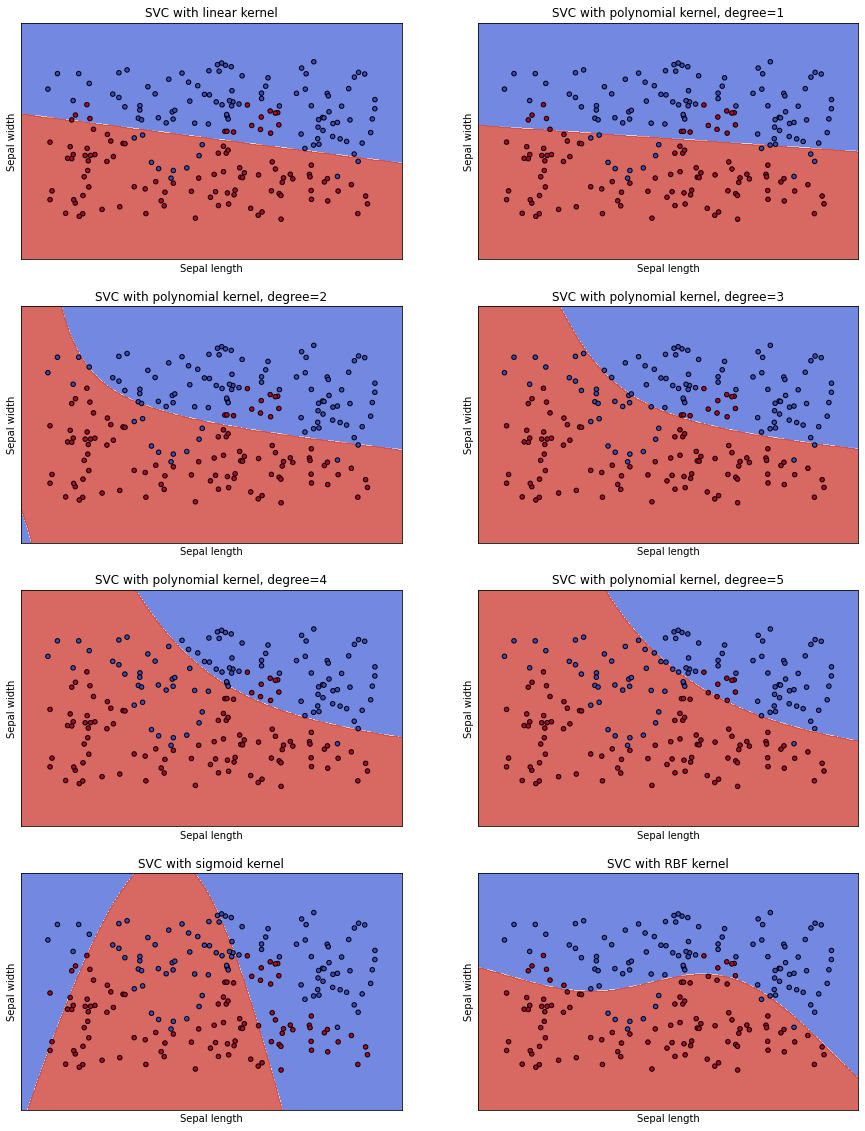

In [65]:
apply_models(X_test, y_test, models, titles, encoder, 4, 2, (15, 20),
             'Task 4_d. The dependence of the quality of the SVC on the kernel')

e. Постройте алгоритм метода опорных векторов, используя различные ядра (полиномиальное степеней 1-5, сигмоидальная функция, гауссово). Изменяя значение параметра ядра (гамма), продемонстрируйте эффект переобучения, выполните при этом визуализацию разбиения пространства признаков на области.

In [66]:
svmdata_df = pd.read_csv('svmdata_e.txt', sep='\t')
svmdata_test_df = pd.read_csv('svmdata_e_test.txt', sep='\t')

In [67]:
encoder = get_encoder(svmdata_df.iloc[:, -1])
X_train, X_test, y_train, y_test = train_test_split_custom(svmdata_df, svmdata_test_df)
y_train = y_train.map(encoder)
y_test = y_test.map(encoder)

Models with gamma=scale


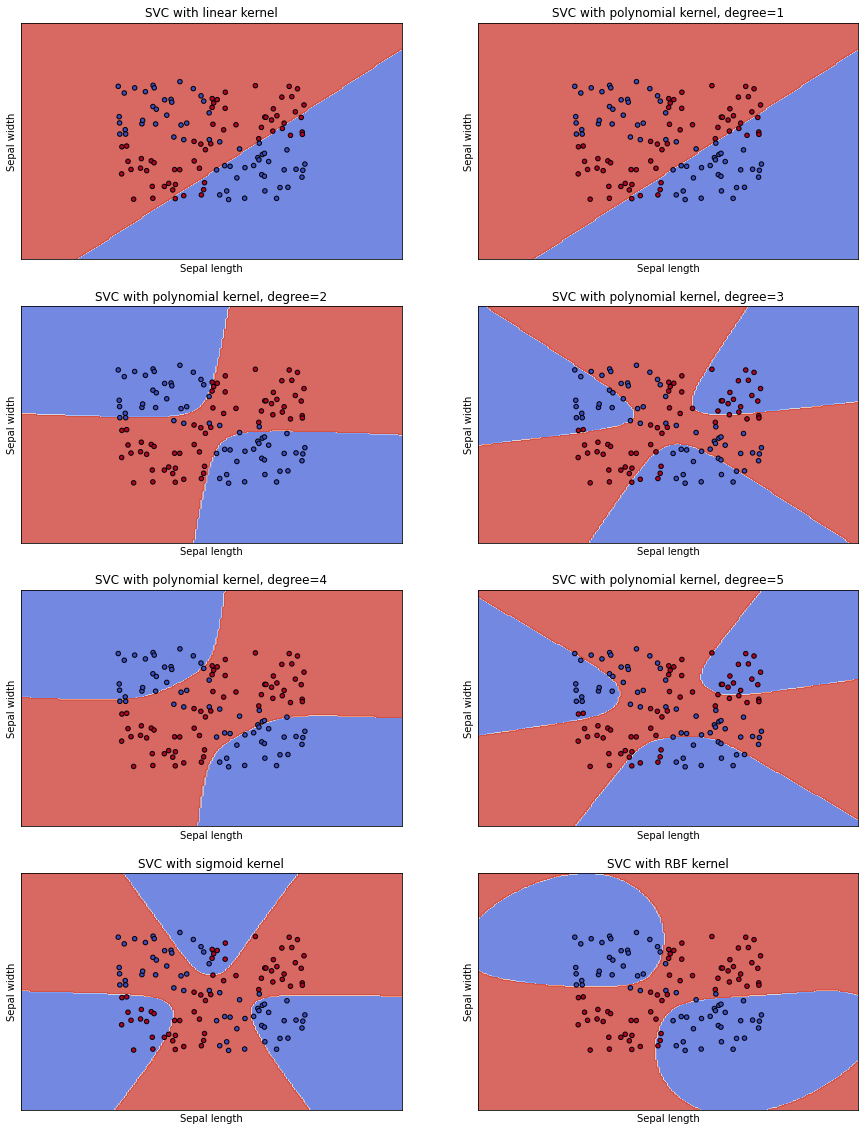

Models with gamma=auto


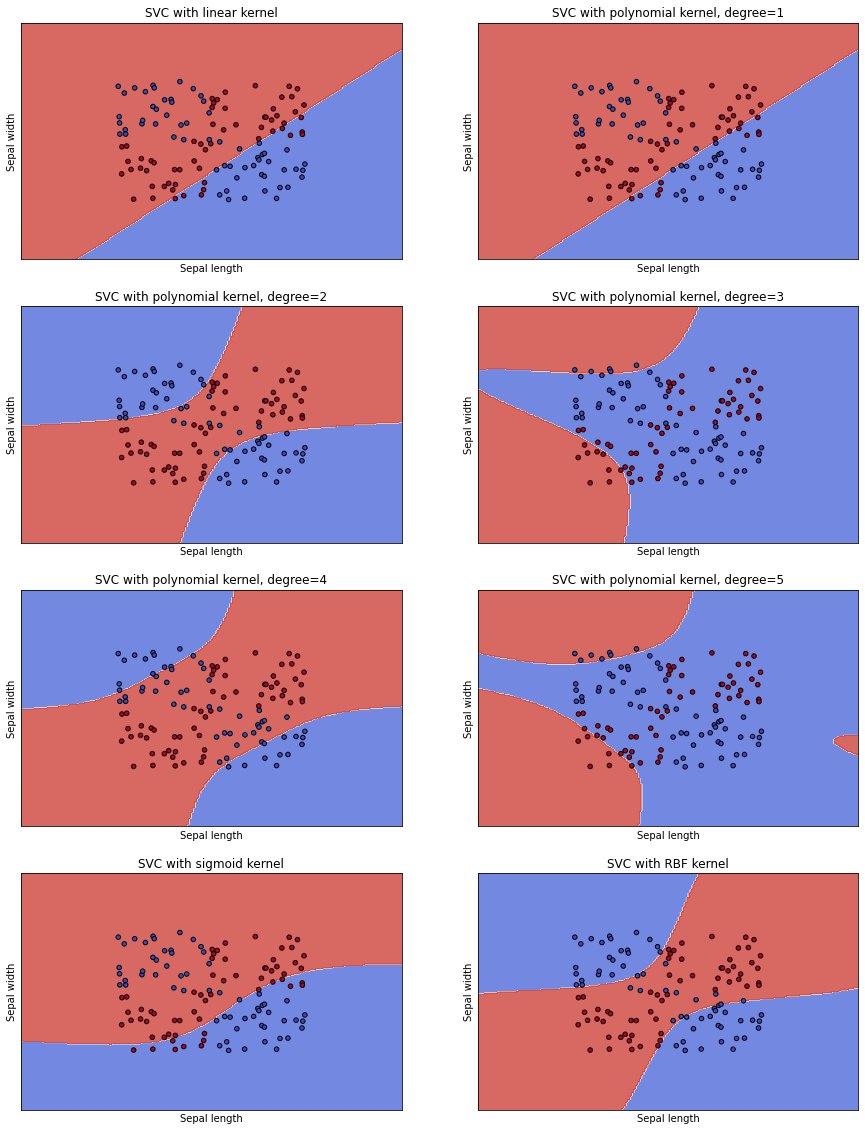

Models with gamma=1


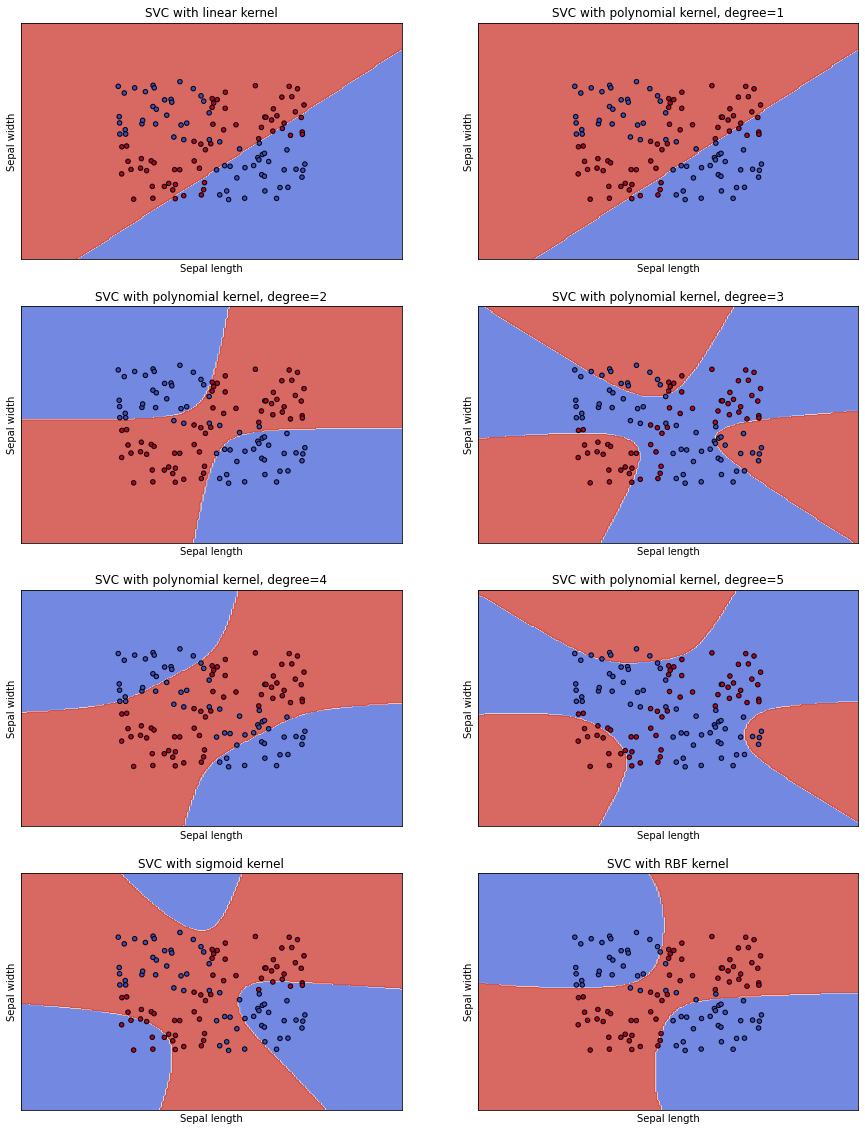

Models with gamma=10


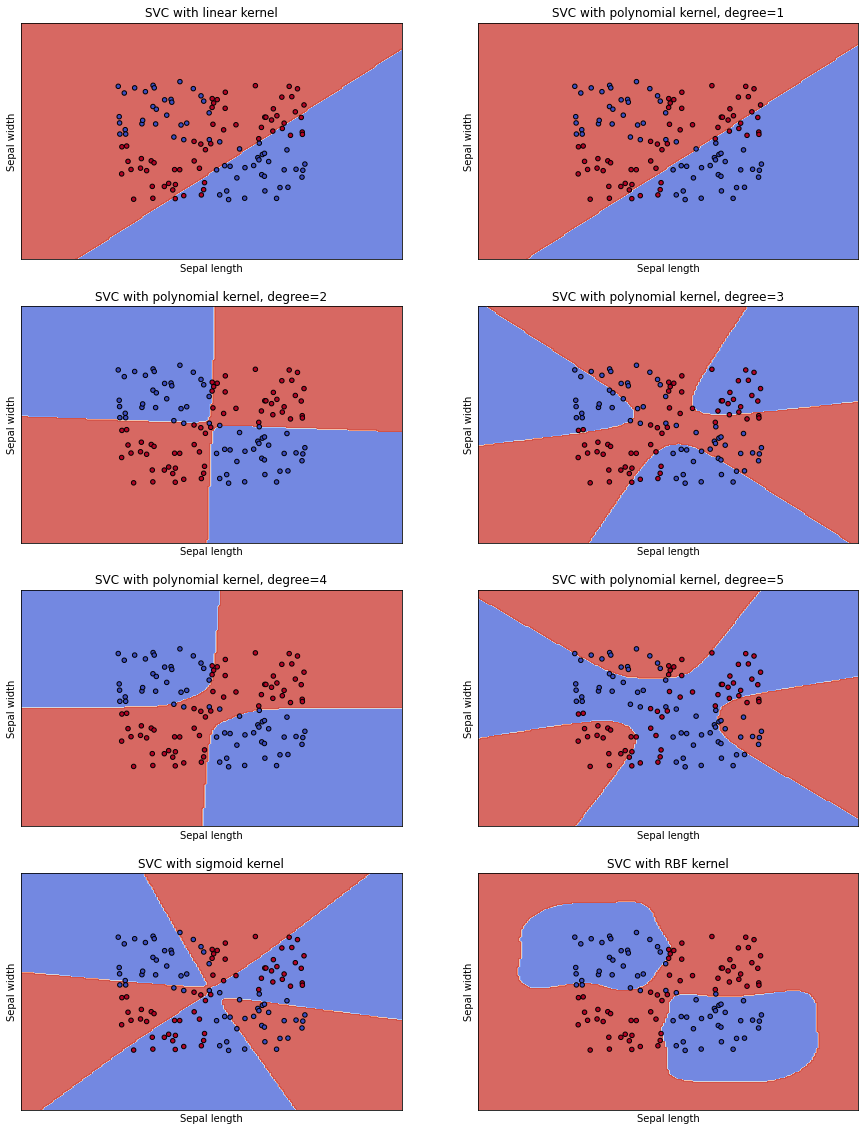

In [68]:
for gamma in ['scale', 'auto', 1, 10]:
    models = get_models()
    models = (clf.set_params(gamma=gamma) for clf in models)
    models = (clf.fit(X_train, y_train) for clf in models)
    print('Models with gamma={}'.format(gamma))
    apply_models(X_test, y_test, models, titles, encoder, 4, 2, (15, 20),
                'Task 4_e. Models with gamma={}'.format(gamma))

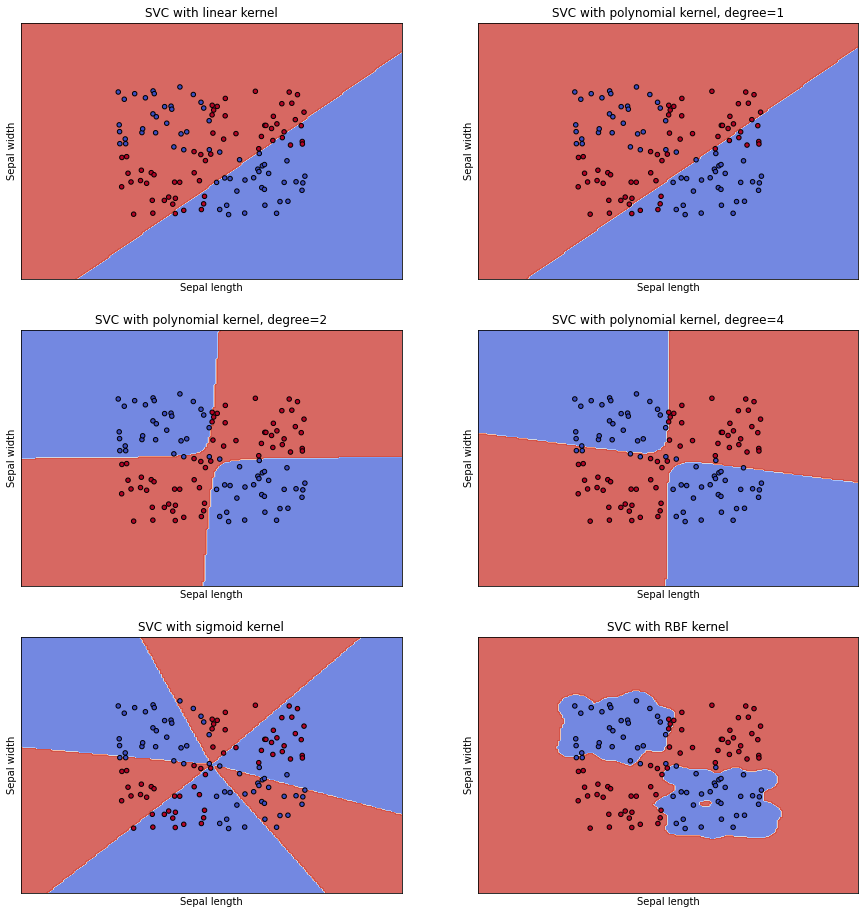

In [69]:
models = np.array(get_models())[[0, 1, 2, 4, 6, 7]]
titles = np.array(titles)[[0, 1, 2, 4, 6, 7]]
models = (clf.set_params(gamma=100) for clf in models)
models = (clf.fit(X_train, y_train) for clf in models)
apply_models(X_test, y_test, models, titles, encoder, 3, 2, (15, 16),
             'Task 4_e. Models with gamma=100')

## Task 5

Постройте классификаторы для различных данных на основе деревьев решений:

In [70]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from os import system, replace, remove

a. Загрузите набор данных Glass из файла glass.csv.
Постройте дерево классификации для модели, предсказывающей тип (Type) по остальным признакам. Визуализируйте результирующее дерево решения. Дайте интерпретацию полученным результатам. Является ли построенное дерево избыточным? Исследуйте зависимость точности классификации от критерия расщепления, максимальной глубины дерева и других параметров по вашему усмотрению.

In [72]:
glass_df = pd.read_csv('glass.csv')
glass_df = glass_df.drop(glass_df.columns[0], axis=1)
glass_df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [73]:
X = glass_df.iloc[:, :-1]
y = glass_df.iloc[:, [-1]]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [75]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [76]:
clf.score(X_train, y_train)

1.0

In [77]:
clf.score(X_test, y_test)

0.6851851851851852

Дерево решений - модель, которая очень легко переобучается, если не давать строгие ограничения. Реализация по умолчанию этой модели из scikit-learn на обучающей выборке даёт 100%-ую точность, в то время как на тестовом наборе данных немногим лучше 62%. Рассмотрим как выглядит получившееся дерево решений:

In [78]:
export_graphviz(clf,
                out_file='Graphs/tree.dot',
                feature_names = X_train.columns,
                class_names=y_train.Type.unique().astype(str),
                rounded = True,
                proportion = False,
                precision = 2,
                filled = True)

In [79]:
system("dot -Tpng ./Graphs/tree.dot -o ./Graphs/tree.png")
replace('./Graphs/tree.png', './Graphs/Task 5_a. Decision tree.png')
remove('./Graphs/tree.dot')

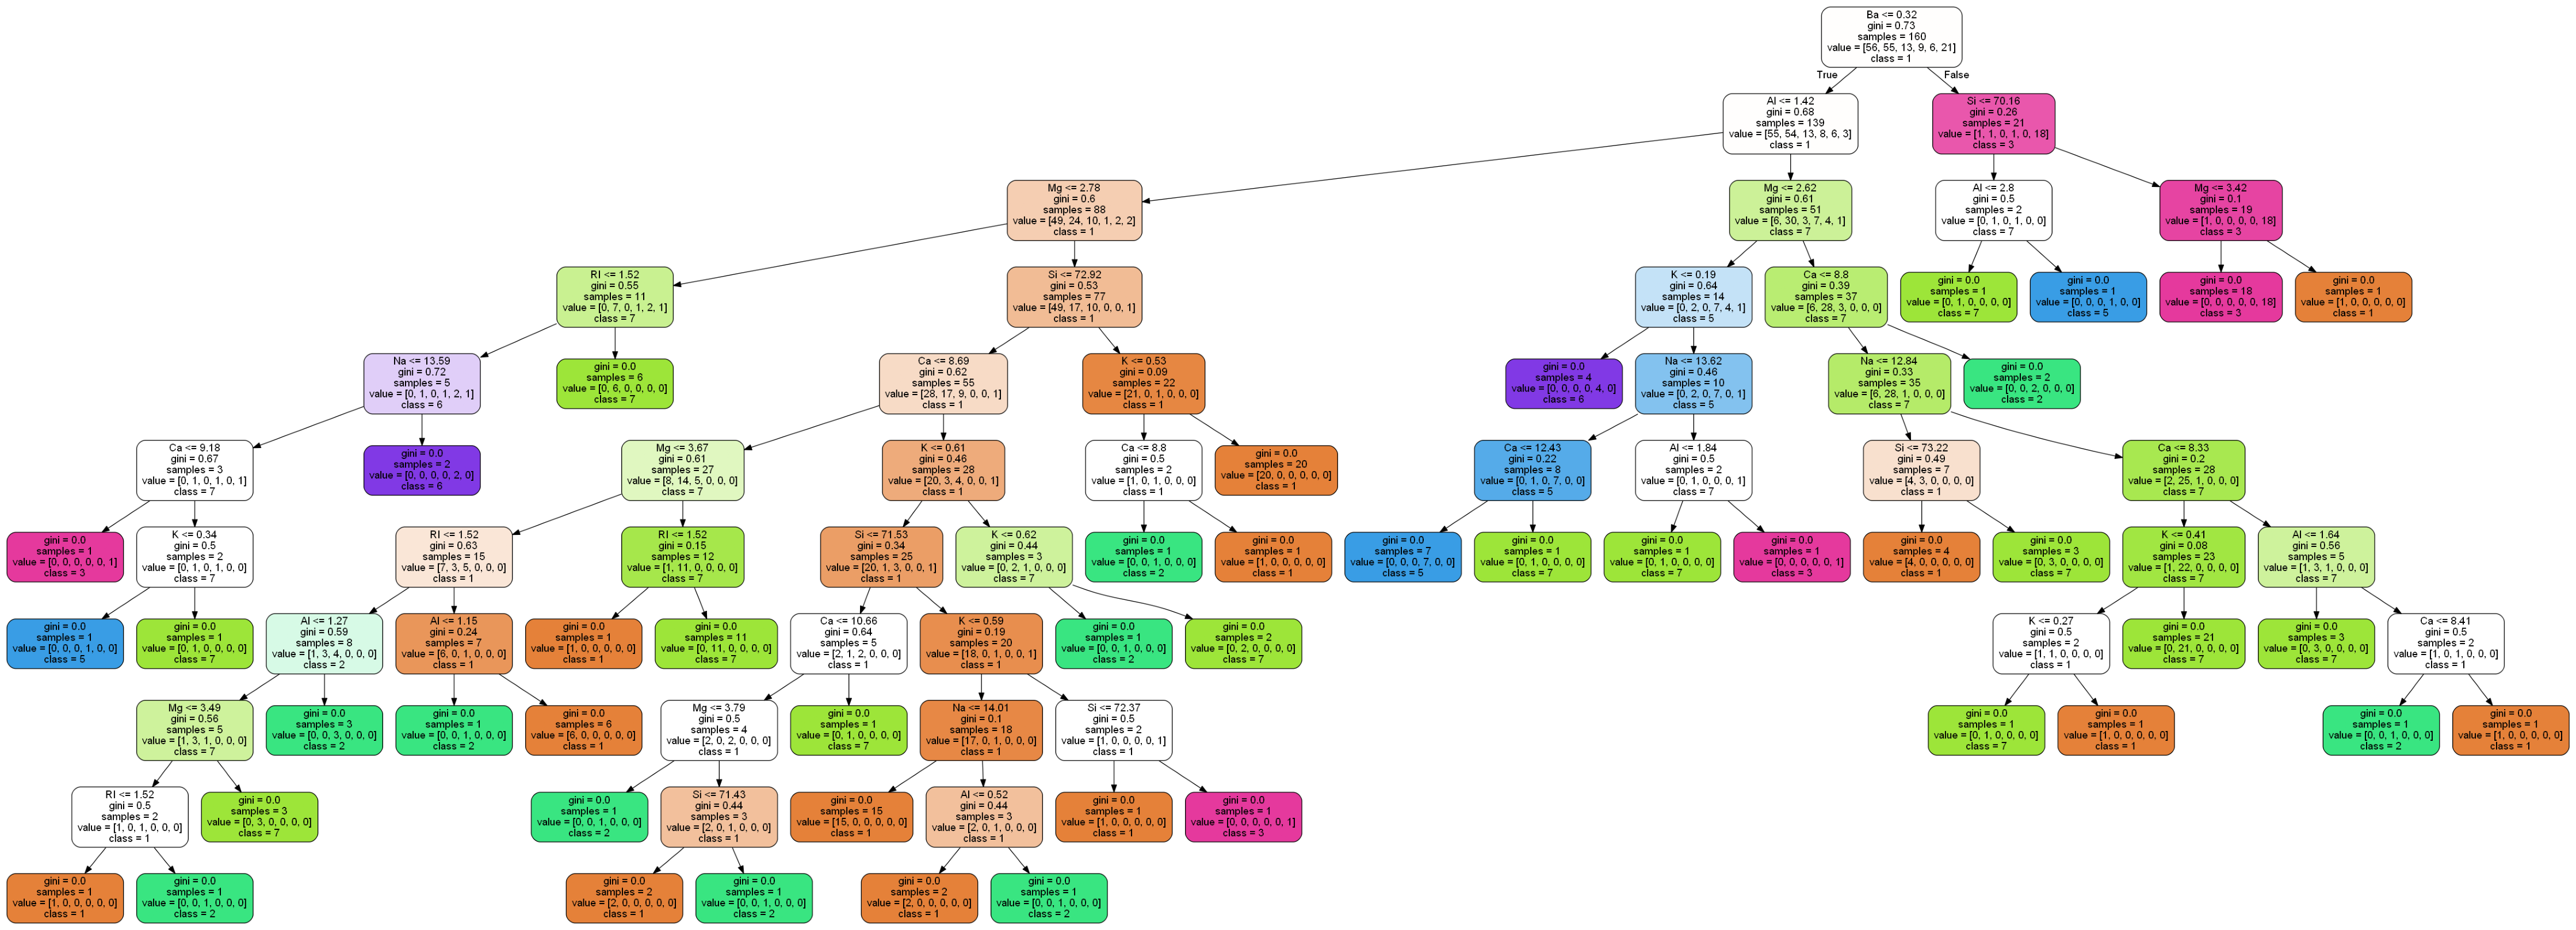

In [80]:
plt.figure(figsize = (80, 50))
plt.imshow(plt.imread('Graphs/Task 5_a. Decision tree.png'))
plt.axis('off');
plt.show();

In [81]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 7),
    'min_samples_split': [10, 20, 30, 40, 50],
    'min_samples_leaf': range(10, 41, 5)
}

In [82]:
clf = DecisionTreeClassifier()
grid_search_cv_clf = GridSearchCV(clf, params, cv=5, n_jobs=-1)

In [83]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 7),
                         'min_samples_leaf': range(10, 41, 5),
                         'min_samples_split': [10, 20, 30, 40, 50]})

In [84]:
results = pd.DataFrame(grid_search_cv_clf.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)
results = results.reset_index(drop=True)
results.to_csv('DataFrames/5_a. Decision tree criteria.csv', index=False)

In [85]:
results = results[['param_criterion', 'param_max_depth','param_min_samples_leaf', \
                   'param_min_samples_split', 'mean_test_score', 'rank_test_score']]
results.head(10)

param_criterion param_max_depth param_min_samples_leaf  \
0            gini               6                     10   
1            gini               6                     10   
2            gini               5                     10   
3            gini               5                     10   
4            gini               5                     10   
5            gini               6                     10   
6            gini               3                     10   
7            gini               4                     10   
8            gini               4                     10   
9            gini               4                     10   

  param_min_samples_split  mean_test_score  rank_test_score  
0                      10           0.6125                1  
1                      20           0.6125                1  
2                      30           0.6125                1  
3                      20           0.6125                1  
4                      10           0.6125                1  
5                      30           0.6125                1  
6                      10           0.6000                7  
7                      10           0.6000                7  
8                      20           0.6000                7  
9                      30           0.6000                7

In [86]:
results.tail(10)

param_criterion param_max_depth param_min_samples_leaf  \
340            gini               6                     35   
341            gini               5                     35   
342            gini               5                     35   
343            gini               5                     35   
344            gini               5                     35   
345            gini               6                     35   
346            gini               2                     35   
347            gini               2                     35   
348            gini               2                     35   
349            gini               5                     35   

    param_min_samples_split  mean_test_score  rank_test_score  
340                      20          0.49375              326  
341                      10          0.49375              326  
342                      20          0.49375              326  
343                      30          0.49375              326  
344                      40          0.49375              326  
345                      10          0.49375              326  
346                      50          0.49375              326  
347                      40          0.49375              326  
348                      30          0.49375              326  
349                      50          0.49375              326

In [87]:
grid_search_cv_clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [88]:
clf = grid_search_cv_clf.best_estimator_
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7222222222222222

b. Загрузите набор данных spam7 из файла spam7.csv. Постройте оптимальное, по вашему мнению, дерево классификации для параметра yesno. Объясните, как был осуществлён подбор параметров. Визуализируйте результирующее дерево решения. Определите наиболее влияющие признаки. Оцените качество классификации.

In [89]:
spam_df = pd.read_csv('spam7.csv')
spam_df

crl.tot  dollar   bang  money  n000  make yesno
0         278   0.000  0.778   0.00  0.00  0.00     y
1        1028   0.180  0.372   0.43  0.43  0.21     y
2        2259   0.184  0.276   0.06  1.16  0.06     y
3         191   0.000  0.137   0.00  0.00  0.00     y
4         191   0.000  0.135   0.00  0.00  0.00     y
...       ...     ...    ...    ...   ...   ...   ...
4596       88   0.000  0.000   0.00  0.00  0.31     n
4597       14   0.000  0.353   0.00  0.00  0.00     n
4598      118   0.000  0.000   0.00  0.00  0.30     n
4599       78   0.000  0.000   0.00  0.00  0.96     n
4600       40   0.000  0.125   0.00  0.00  0.00     n

[4601 rows x 7 columns]

In [90]:
X = spam_df.iloc[:, :-1]
y = spam_df.iloc[:, [-1]]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [92]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 7),
    'min_samples_split': [25, 40, 50, 60, 75, 100],
    'min_samples_leaf': range(10, 50, 2)
}

In [93]:
clf = DecisionTreeClassifier()
grid_search_cv_clf = GridSearchCV(clf, params, cv=5, n_jobs=-1)

In [94]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 7),
                         'min_samples_leaf': range(10, 50, 2),
                         'min_samples_split': [25, 40, 50, 60, 75, 100]})

In [95]:
grid_search_cv_clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 18,
 'min_samples_split': 40}

In [96]:
clf = grid_search_cv_clf.best_estimator_
clf.score(X_test, y_test)

0.8601216333622936

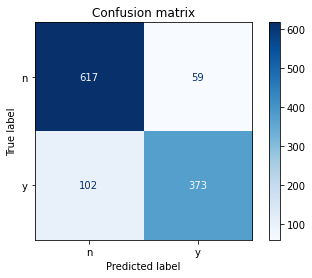

In [97]:
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.savefig(GRAPHS_FOLDER.format('Task 5_b. Confusion matrix'), bbox_inches='tight')
plt.show()

In [98]:
export_graphviz(clf,
                out_file='Graphs/tree.dot',
                feature_names = X_train.columns,
                class_names=y_train.yesno.unique().astype(str),
                rounded = True,
                proportion = False,
                precision = 2,
                filled = True)

In [99]:
system("dot -Tpng ./Graphs/tree.dot -o ./Graphs/tree.png")
replace('./Graphs/tree.png', './Graphs/Task 5_b. Decision tree.png')
remove('./Graphs/tree.dot')

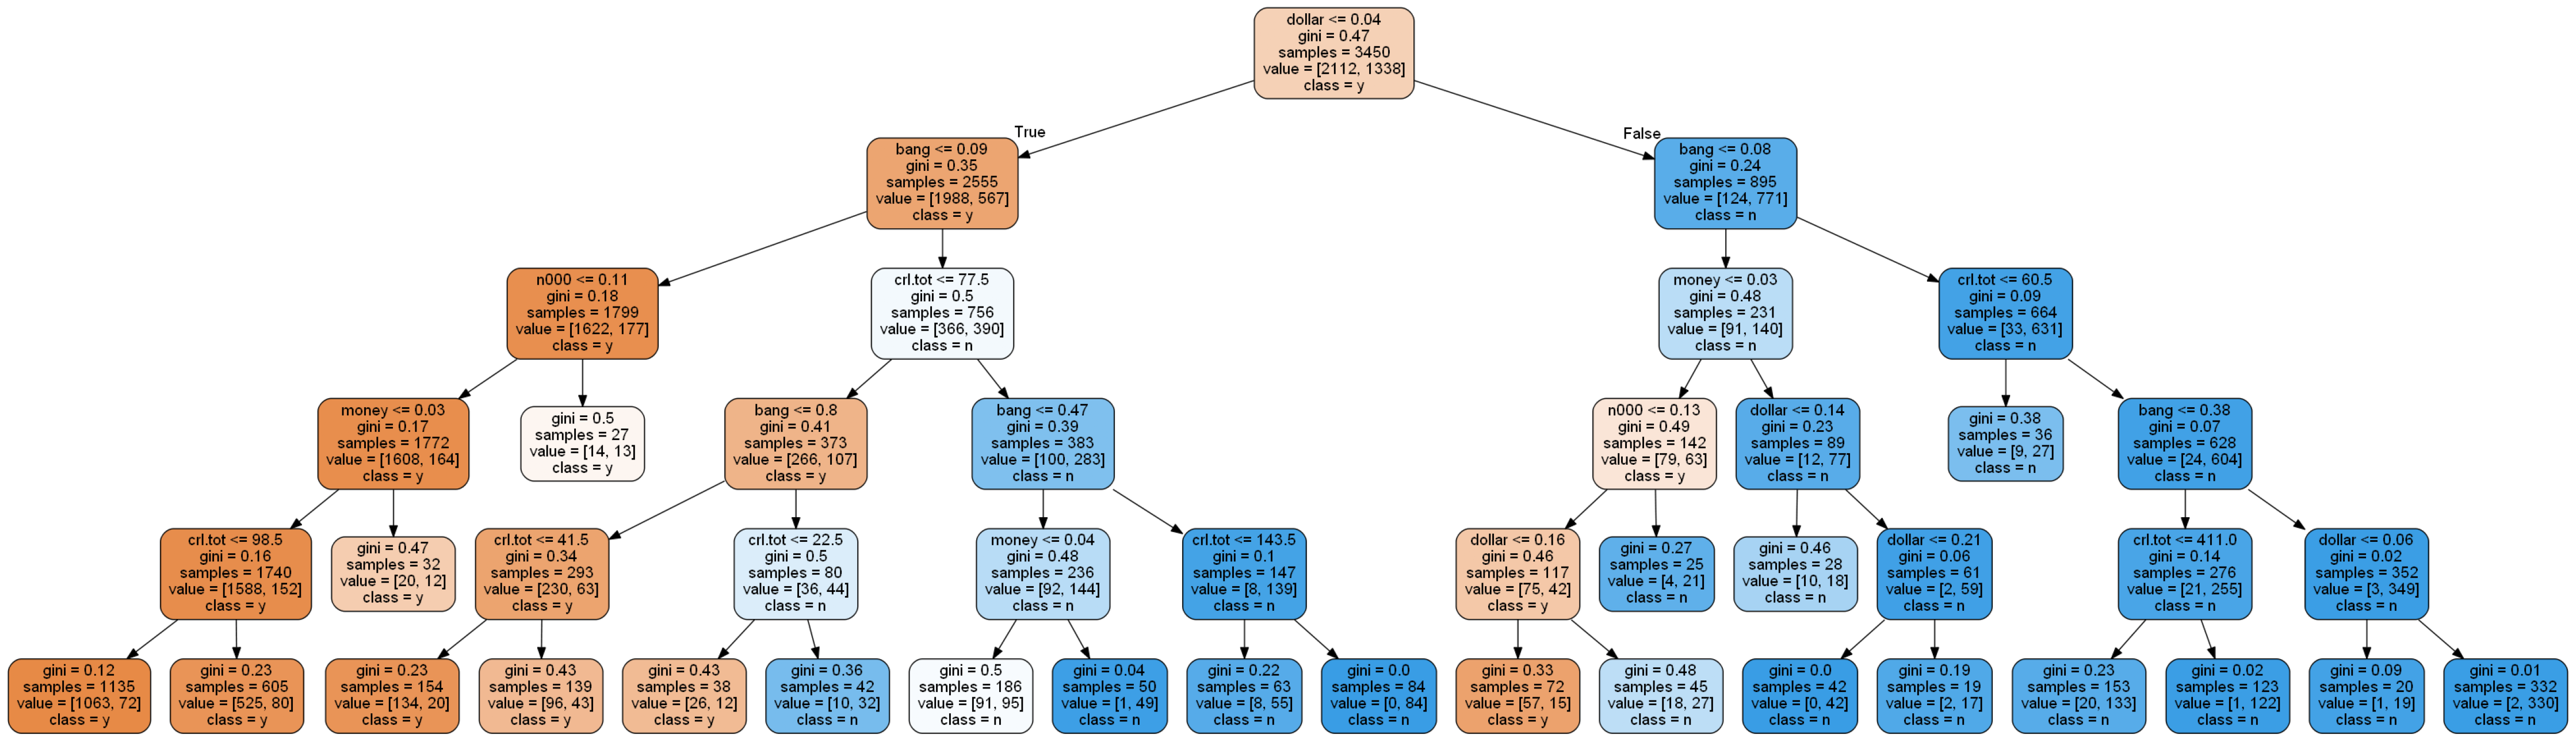

In [100]:
plt.figure(figsize = (80, 50))
plt.imshow(plt.imread('Graphs/Task 5_b. Decision tree.png'))
plt.axis('off');
plt.show();

## Task 6

Загрузите набор данных из файла bank_scoring_train.csv. Это набор финансовых данных, характеризующий физических лиц. Целевым столбцом является «SeriousDlqin2yrs», означающий, ухудшится ли финансовая ситуация у клиента. Постройте систему по принятию решения о выдаче или невыдаче кредита физическому лицу. Сделайте как минимум 2 варианта системы на основе различных классификаторов. Подберите подходящую метрику качества работы системы исходя из специфики задачи и определите, принятие решения какой системой сработало лучше на bank_scoring_test.csv.

In [101]:
bank_df_train = pd.read_csv('bank_scoring_train.csv', sep='\t')
bank_df_test = pd.read_csv('bank_scoring_test.csv', sep='\t')
bank_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96216 entries, 0 to 96215
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      96216 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  96216 non-null  float64
 2   age                                   96216 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  96216 non-null  int64  
 4   DebtRatio                             96216 non-null  float64
 5   MonthlyIncome                         96216 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       96216 non-null  int64  
 7   NumberOfTimes90DaysLate               96216 non-null  int64  
 8   NumberRealEstateLoansOrLines          96216 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  96216 non-null  int64  
 10  NumberOfDependents                    96216 non-null  float64
dtypes: float64(4), 

In [102]:
bank_df_train = bank_df_train.reindex(columns=(
    list([elem for elem in bank_df_train.columns if elem != 'SeriousDlqin2yrs'] + ['SeriousDlqin2yrs'])
))
bank_df_test = bank_df_test.reindex(columns=(
    list([elem for elem in bank_df_test.columns if elem != 'SeriousDlqin2yrs'] + ['SeriousDlqin2yrs'])
))

In [103]:
bank_df_train.head()

RevolvingUtilizationOfUnsecuredLines  age  \
0                              0.975614   39   
1                              0.006634   75   
2                              0.227432   48   
3                              0.290217   59   
4                              0.000000   80   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     1   0.678552         1850.0   
1                                     0   0.082087        10500.0   
2                                     1   0.202145         6059.0   
3                                     0   0.674392         4400.0   
4                                     0   0.000000         2596.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                                4                        0   
1                               21                        0   
2                                9                        0   
3                                6                        0   
4                                2                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             0                                     0   
1                             1                                     0   
2                             1                                     0   
3                             2                                     0   
4                             0                                     0   

   NumberOfDependents  SeriousDlqin2yrs  
0                 3.0                 0  
1                 0.0                 0  
2                 3.0                 0  
3                 0.0                 0  
4                 1.0                 0

In [104]:
X_train = bank_df_train.iloc[:, :-1]
y_train = bank_df_train.iloc[:, [-1]]
X_test = bank_df_test.iloc[:, :-1]
y_test = bank_df_test.iloc[:, [-1]]

Accuracy score: 0.93152621294641


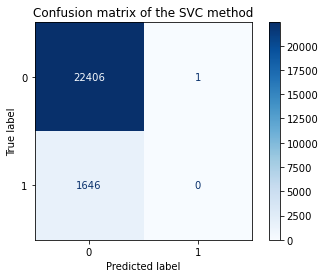

In [105]:
clf = SVC()
clf.fit(X_train, y_train.values.ravel())
print('Accuracy score:', clf.score(X_test, y_test))
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix of the SVC method')
plt.savefig(GRAPHS_FOLDER.format('Task 6. Confusion matrix of the SVC method'), bbox_inches='tight')
plt.show()

Accuracy score: 0.9342701534112169


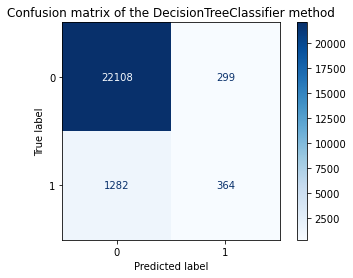

In [106]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_split=100, min_samples_leaf=10, criterion='gini') #10000, 5000
clf.fit(X_train, y_train)
print('Accuracy score:', clf.score(X_test, y_test))
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)
plt.title('Confusion matrix of the DecisionTreeClassifier method')
plt.savefig(GRAPHS_FOLDER.format('Task 6. Confusion matrix of the DecisionTreeClassifier method'), bbox_inches='tight')
plt.show()

In [107]:
knn_params ={
    'n_neighbors': range(1, 21),
    'weights': ['distance', 'uniform'],
    'p': [1, 2, 3]
}
clf = KNeighborsClassifier()
grid_search_cv_clf = GridSearchCV(clf, knn_params, cv=5, n_jobs=-1)
grid_search_cv_clf.fit(X_train, y_train.values.ravel())

clf = grid_search_cv_clf.best_estimator_

In [108]:
grid_search_cv_clf.best_params_

{'n_neighbors': 20, 'p': 1, 'weights': 'distance'}

Accuracy score: 0.9691098823431589


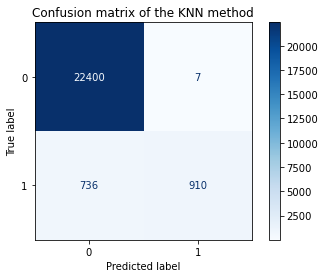

In [109]:
clf.fit(X_train, y_train.values.ravel())
print('Accuracy score:', clf.score(X_test, y_test))
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix of the KNN method')
plt.savefig(GRAPHS_FOLDER.format('Task 6. Confusion matrix of the KNN method'), bbox_inches='tight')
plt.show()